In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#loading xgboost and catboost classifier libraries
!pip install xgboost
!pip install catboost
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
!pip install shap==0.40.0

In [6]:
import shap

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import statsmodels.api as sm

### DATASET

In [9]:
#Loading NPS dataset
df = pd.read_csv('Business_Case.csv')

In [10]:
df

,c_accountid,d_observation_date,c_entity,n_account_balance,d_acq_date,n_active_num,n_tel_notel,d_last_payment_date,n_pay_30,n_pay_60,...,n_in_dialler_obs_day,n_arrangement_active,d_inactivation_date,d_last_broken_date,c_subregion,gender,age,d_last_inbound_date,Target_Amount,Target
0,4169220,01/01/2022,Entity 1,4643.12,13/04/2018,2,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_59,M,31,NaN,3500.0,1
1,4169508,01/01/2022,Entity 1,4823.09,13/04/2018,4,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_28,M,28,NaN,0.0,0
2,4169571,01/01/2022,Entity 1,966.41,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,NaN,M,35,NaN,0.0,0
3,4180740,01/01/2022,Entity 1,496.58,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_5,M,31,NaN,0.0,0
4,4167348,01/01/2022,Entity 1,2609.66,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_25,M,30,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,4166998,01/01/2022,Entity 1,333.69,13/04/2018,2,1,NaN,0.0,0.0,...,1,0,NaN,28/12/2021,Subregion_42,K,37,NaN,0.0,0
3466,4168596,01/01/2022,Entity 1,2671.60,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_45,K,42,NaN,0.0,0
3467,4172502,01/01/2022,Entity 1,893.32,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_48,K,35,NaN,0.0,0
3468,4173955,01/01/2022,Entity 1,439.56,13/04/2018,1,1,NaN,0.0,0.0,...,1,0,NaN,NaN,Subregion_45,K,31,NaN,0.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   c_accountid                      3470 non-null   int64  
 1   d_observation_date               3470 non-null   object 
 2   c_entity                         3470 non-null   object 
 3   n_account_balance                3470 non-null   float64
 4   d_acq_date                       3470 non-null   object 
 5   n_active_num                     3470 non-null   int64  
 6   n_tel_notel                      3470 non-null   int64  
 7   d_last_payment_date              313 non-null    object 
 8   n_pay_30                         3470 non-null   float64
 9   n_pay_60                         3470 non-null   float64
 10  n_pay_90                         3470 non-null   float64
 11  n_pay_180                        3470 non-null   float64
 12  n_pay_count_30      

In [12]:
#dropping id columns, date columns, columns with a unique value of 1,  and columns with missing values greater than 50%
drop = ['c_accountid','d_observation_date','n_tel_notel', 'd_last_sms_date' , 'd_rpc_date', 'd_payment_order_date', 'd_title_day', 'd_execution_date', 'd_unsuccesfull_exe_date', 'd_maturity_date', 'n_in_dialler_obs_day', 'd_inactivation_date', 'd_last_broken_date']

In [13]:
df = df.drop(drop, axis=1)
df.head()

,c_entity,n_account_balance,d_acq_date,n_active_num,d_last_payment_date,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,...,n_deceased,n_bancrupcy_failed_lawsuits_etc,d_lawsuit_date,n_arrangement_active,c_subregion,gender,age,d_last_inbound_date,Target_Amount,Target
0,Entity 1,4643.12,13/04/2018,2,NaN,0.0,0.0,0.0,0.0,0,...,0,0,NaN,0,Subregion_59,M,31,NaN,3500.0,1
1,Entity 1,4823.09,13/04/2018,4,NaN,0.0,0.0,0.0,0.0,0,...,0,0,15/07/2018,0,Subregion_28,M,28,NaN,0.0,0
2,Entity 1,966.41,13/04/2018,1,NaN,0.0,0.0,0.0,0.0,0,...,0,0,NaN,0,NaN,M,35,NaN,0.0,0
3,Entity 1,496.58,13/04/2018,1,NaN,0.0,0.0,0.0,0.0,0,...,0,0,23/07/2018,0,Subregion_5,M,31,NaN,0.0,0
4,Entity 1,2609.66,13/04/2018,1,NaN,0.0,0.0,0.0,0.0,0,...,0,0,NaN,0,Subregion_25,M,30,NaN,0.0,0


In [14]:
#df.describe(include='all')
df.describe()

,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,n_pay_count_180,n_sms_count,n_deceased,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,age,Target_Amount,Target
count,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000
mean,14385.726939,1.965994,4.735905,24.211847,45.872648,104.091599,0.014121,0.077522,0.141787,0.318156,1.515274,0.004035,0.002017,0.071758,-688.678963,160.872666,0.200000
std,27643.229669,2.062443,58.580808,151.852152,265.206277,569.291480,0.118007,0.326652,0.540182,1.150877,2.617693,0.063399,0.050895,0.258124,2616.923267,973.097862,0.400058
min,13.170000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,0.000000,0.000000
25%,1190.745000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000
50%,3824.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000
75%,15305.925000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000
max,342964.730000,42.000000,2000.000000,4000.000000,6000.000000,12000.000000,1.000000,3.000000,5.000000,8.000000,32.000000,1.000000,2.000000,1.000000,88.000000,21000.000000,1.000000


### Preprocessing

#### missing values

<AxesSubplot:>

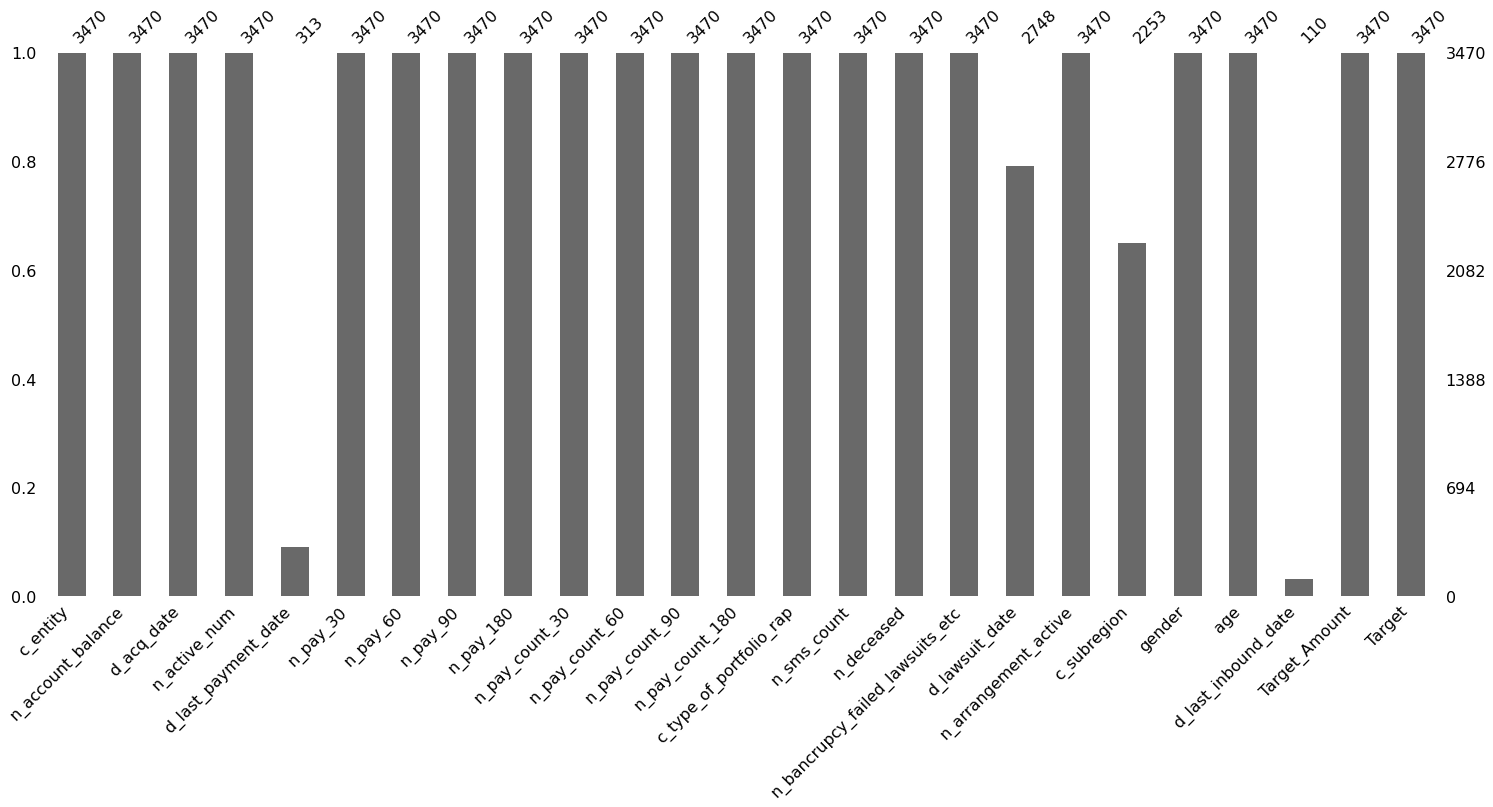

In [15]:
#plotting missing values
msno.bar(df)

#### UNIVARIATE ANALYSIS

#### 'NEW' binary variables

In [16]:
#creating a new binary feature from: payment date
df['d_last_payment_date'] = df['d_last_payment_date'].fillna(0)

In [17]:
df['payment_flag'] = [0 if x == 0 else 1 for x in df['d_last_payment_date']]

In [18]:
df['payment_flag'].value_counts()

0    3157
1     313
Name: payment_flag, dtype: int64

In [19]:
ct_pay_flag = pd.crosstab(df['payment_flag'], df
                 ['Target'],  normalize= True, margins=True, margins_name='Total')
ct_pay_flag

Target,0,1,Total
payment_flag,,,
0,0.79366,0.116138,0.909798
1,0.00634,0.083862,0.090202
Total,0.80000,0.200000,1.000000


In [20]:
#creating a 'others' category for nan in the subregion variable
df['c_subregion'] = df['c_subregion'].fillna('Others')

In [21]:
df['c_subregion'].value_counts()

Others          1217
Subregion_28     147
Subregion_48      89
Subregion_21      68
Subregion_43      63
                ... 
Subregion_19      10
Subregion_9       10
Subregion_13      10
Subregion_33       9
Subregion_39       9
Name: c_subregion, Length: 66, dtype: int64

In [22]:
ct_inbound_flag = pd.crosstab(df['Target'], df
                 ['c_subregion'],  normalize= True, margins=True, margins_name='Total')
ct_inbound_flag

c_subregion,Others,Subregion_1,Subregion_10,Subregion_11,Subregion_12,Subregion_13,Subregion_14,Subregion_15,Subregion_16,Subregion_17,...,Subregion_61,Subregion_62,Subregion_63,Subregion_64,Subregion_65,Subregion_66,Subregion_7,Subregion_8,Subregion_9,Total
Target,,,,,,,,,,,,,,,,,,,,,
0,0.283862,0.010086,0.004611,0.012392,0.003746,0.002594,0.009510,0.005187,0.012104,0.005187,...,0.007781,0.009798,0.008646,0.003458,0.011527,0.004899,0.005764,0.011816,0.002882,0.8
1,0.066859,0.001153,0.002305,0.002305,0.003170,0.000288,0.001153,0.001153,0.003458,0.001729,...,0.002594,0.001441,0.003170,0.002017,0.001153,0.002305,0.002882,0.002594,0.000000,0.2
Total,0.350720,0.011239,0.006916,0.014697,0.006916,0.002882,0.010663,0.006340,0.015562,0.006916,...,0.010375,0.011239,0.011816,0.005476,0.012680,0.007205,0.008646,0.014409,0.002882,1.0


In [23]:
#creating a new variable out of inbound date variable
df['d_last_inbound_date'] = df['d_last_inbound_date'].fillna(0)

In [24]:
df['inbound_flag'] = [0 if x == 0 else 1 for x in df['d_last_inbound_date']]

In [25]:
df['inbound_flag'].value_counts()

0    3360
1     110
Name: inbound_flag, dtype: int64

In [26]:
ct_inbound_flag = pd.crosstab(df['inbound_flag'], df
                 ['Target'],  normalize= True, margins=True, margins_name='Total')
ct_inbound_flag

Target,0,1,Total
inbound_flag,,,
0,0.781268,0.187032,0.9683
1,0.018732,0.012968,0.0317
Total,0.800000,0.200000,1.0000


In [27]:
#creating a new binary feature from: payment date
df['d_lawsuit_date'] = df['d_lawsuit_date'].fillna(0)

In [28]:
df['lawsuit_flag'] = [0 if x == 0 else 1 for x in df['d_lawsuit_date']]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   c_entity                         3470 non-null   object 
 1   n_account_balance                3470 non-null   float64
 2   d_acq_date                       3470 non-null   object 
 3   n_active_num                     3470 non-null   int64  
 4   d_last_payment_date              3470 non-null   object 
 5   n_pay_30                         3470 non-null   float64
 6   n_pay_60                         3470 non-null   float64
 7   n_pay_90                         3470 non-null   float64
 8   n_pay_180                        3470 non-null   float64
 9   n_pay_count_30                   3470 non-null   int64  
 10  n_pay_count_60                   3470 non-null   int64  
 11  n_pay_count_90                   3470 non-null   int64  
 12  n_pay_count_180     

#### numeric variables

In [30]:
# identifying numeric variables 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num

,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,n_pay_count_180,n_sms_count,n_deceased,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,age,Target_Amount,Target,payment_flag,inbound_flag,lawsuit_flag
0,4643.12,2,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,31,3500.0,1,0,0,0
1,4823.09,4,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,28,0.0,0,0,0,1
2,966.41,1,0.0,0.0,0.0,0.0,0,0,0,0,4,0,0,0,35,0.0,0,0,0,0
3,496.58,1,0.0,0.0,0.0,0.0,0,0,0,0,6,0,0,0,31,0.0,0,0,0,1
4,2609.66,1,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,30,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,333.69,2,0.0,0.0,0.0,0.0,0,0,0,0,2,0,0,0,37,0.0,0,0,0,0
3466,2671.60,1,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,42,0.0,0,0,0,1
3467,893.32,1,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,35,0.0,0,0,0,1
3468,439.56,1,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,31,0.0,0,0,0,1


In [31]:
df_num.describe()

,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,n_pay_count_180,n_sms_count,n_deceased,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,age,Target_Amount,Target,payment_flag,inbound_flag,lawsuit_flag
count,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000
mean,14385.726939,1.965994,4.735905,24.211847,45.872648,104.091599,0.014121,0.077522,0.141787,0.318156,1.515274,0.004035,0.002017,0.071758,-688.678963,160.872666,0.200000,0.090202,0.031700,0.791931
std,27643.229669,2.062443,58.580808,151.852152,265.206277,569.291480,0.118007,0.326652,0.540182,1.150877,2.617693,0.063399,0.050895,0.258124,2616.923267,973.097862,0.400058,0.286512,0.175226,0.405985
min,13.170000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1190.745000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3824.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15305.925000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,342964.730000,42.000000,2000.000000,4000.000000,6000.000000,12000.000000,1.000000,3.000000,5.000000,8.000000,32.000000,1.000000,2.000000,1.000000,88.000000,21000.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df['age'] = df['age'].replace([-9999], 44)

In [33]:
df['n_active_num'].value_counts()

1     1910
2      882
3      336
4      163
5       70
6       28
8       15
12      10
7       10
9        8
13       7
10       6
11       6
14       5
15       3
16       3
24       2
22       2
19       1
42       1
20       1
35       1
Name: n_active_num, dtype: int64

In [34]:
#converting the age variable into categorical: age bands
def AgeBands(df):    
    if (df['age'] in (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38)):
        return '22-38'
    elif (df['age'] in (39,40,41,42,43,44,45,46,47,48)):
        return '39-48'
    elif (df['age'] in (49,50,51,52,53,54,55,56,57,58)):
        return '49-58'
    elif (df['age'] in (59,60,61,62,63,64,65,66,67,68)):
        return '59-68'
    elif (df['age'] in (69,70,71,72,73,74,75,76,77,78)):
        return '69-78'
    elif (df['age'] in (79,80,81,82,83,84,85,86,87,88)):
        return '79-88'

In [35]:
df['age_bands'] = df.apply(AgeBands, axis = 1)

In [36]:
df['age_bands'].value_counts()

39-48    1188
22-38     971
49-58     662
59-68     456
69-78     160
79-88      33
Name: age_bands, dtype: int64

In [37]:
df['n_sms_count'].value_counts(normalize=True)

0     0.617867
1     0.090490
2     0.068012
6     0.059654
5     0.046398
3     0.038905
7     0.033718
4     0.020173
8     0.009222
10    0.004035
12    0.004035
14    0.001729
11    0.001441
9     0.001441
13    0.000865
15    0.000576
18    0.000576
32    0.000288
16    0.000288
20    0.000288
Name: n_sms_count, dtype: float64

In [38]:
df['sms_flag'] = [0 if x == 0 else 1 for x in df['n_sms_count']]

In [39]:
df['sms_flag'].value_counts()

0    2144
1    1326
Name: sms_flag, dtype: int64

In [40]:
#generating a loop to plot numeric variables 
columns = df_num.columns
columns = list(columns)
columns

['n_account_balance',
 'n_active_num',
 'n_pay_30',
 'n_pay_60',
 'n_pay_90',
 'n_pay_180',
 'n_pay_count_30',
 'n_pay_count_60',
 'n_pay_count_90',
 'n_pay_count_180',
 'n_sms_count',
 'n_deceased',
 'n_bancrupcy_failed_lawsuits_etc',
 'n_arrangement_active',
 'age',
 'Target_Amount',
 'Target',
 'payment_flag',
 'inbound_flag',
 'lawsuit_flag']

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

<Figure size 432x288 with 0 Axes>

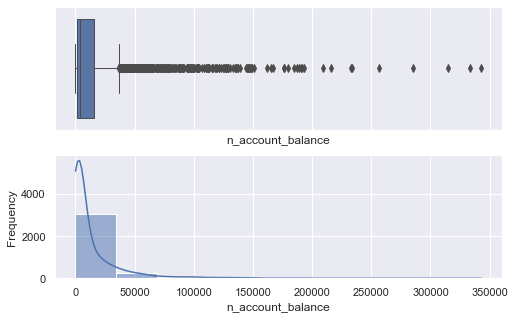

<Figure size 576x360 with 0 Axes>

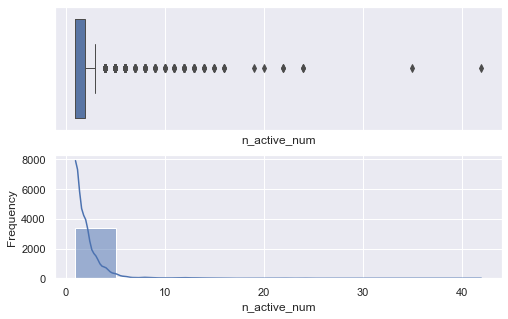

<Figure size 576x360 with 0 Axes>

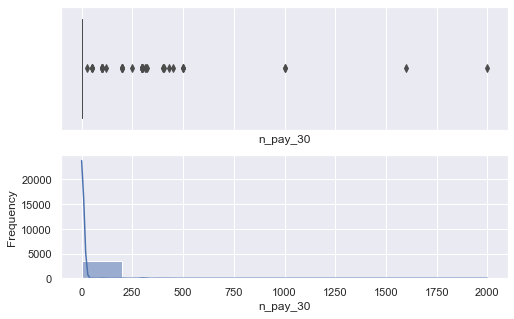

<Figure size 576x360 with 0 Axes>

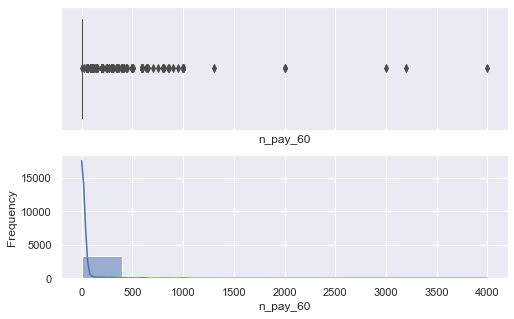

<Figure size 576x360 with 0 Axes>

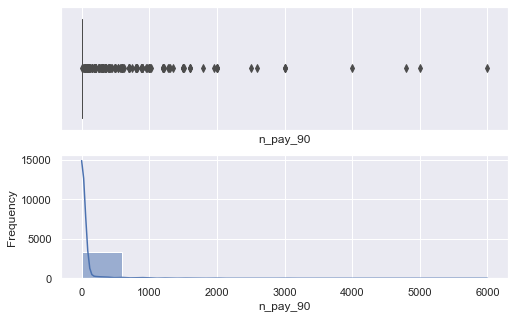

<Figure size 576x360 with 0 Axes>

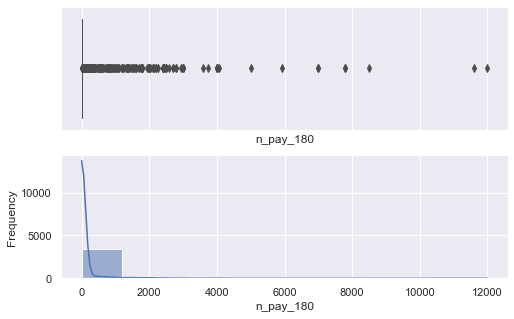

<Figure size 576x360 with 0 Axes>

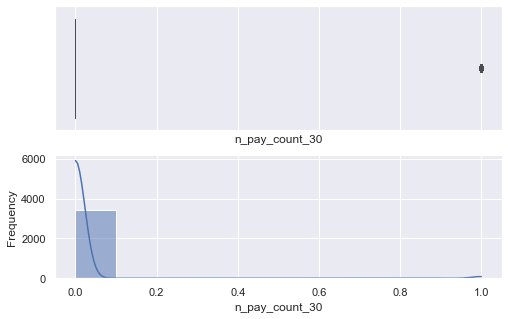

<Figure size 576x360 with 0 Axes>

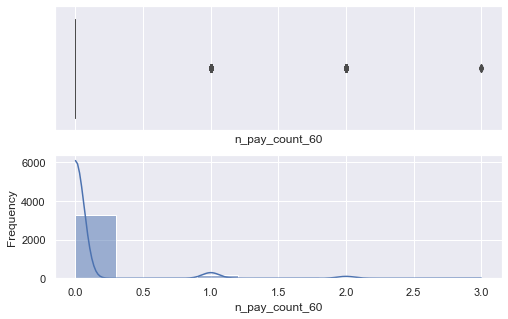

<Figure size 576x360 with 0 Axes>

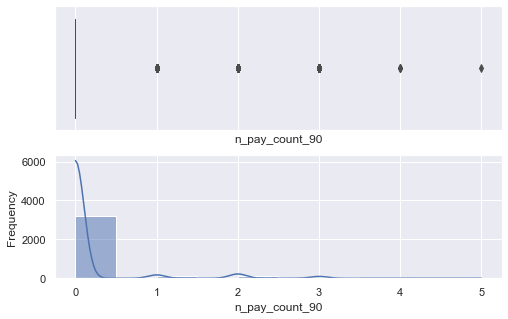

<Figure size 576x360 with 0 Axes>

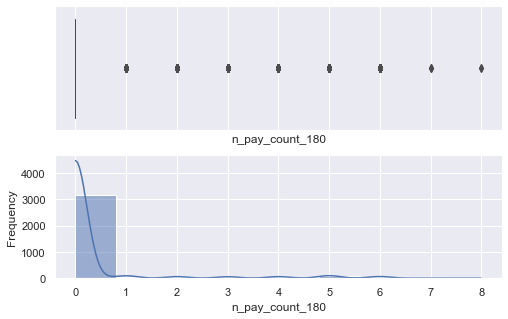

<Figure size 576x360 with 0 Axes>

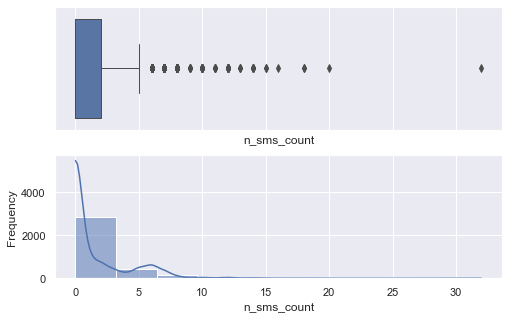

<Figure size 576x360 with 0 Axes>

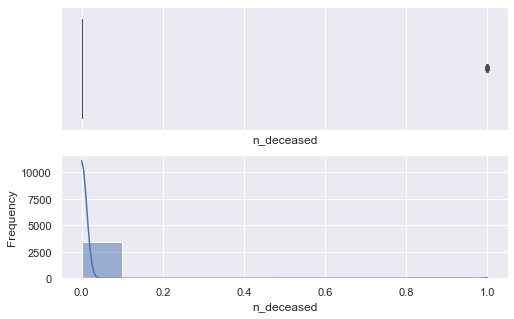

<Figure size 576x360 with 0 Axes>

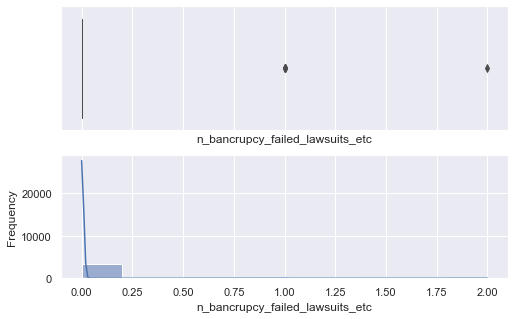

<Figure size 576x360 with 0 Axes>

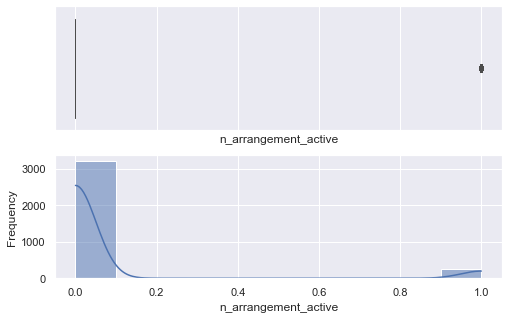

<Figure size 576x360 with 0 Axes>

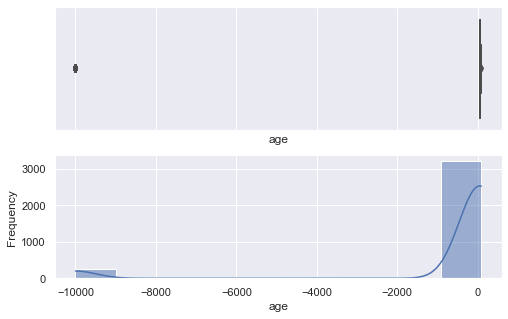

<Figure size 576x360 with 0 Axes>

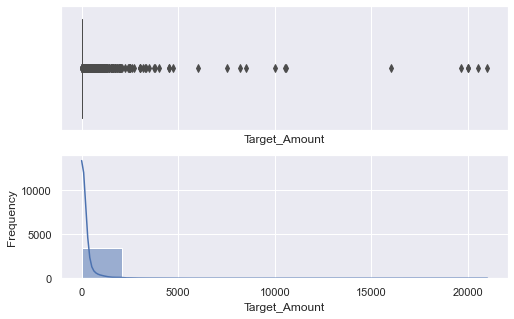

<Figure size 576x360 with 0 Axes>

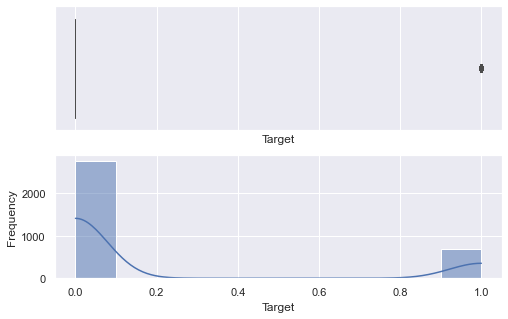

<Figure size 576x360 with 0 Axes>

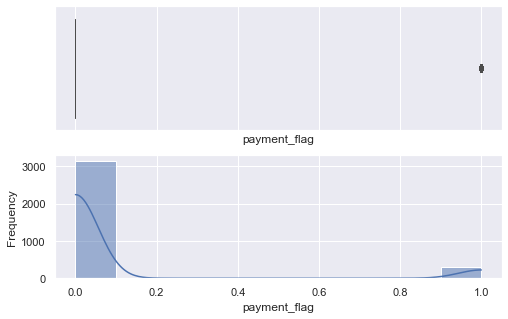

<Figure size 576x360 with 0 Axes>

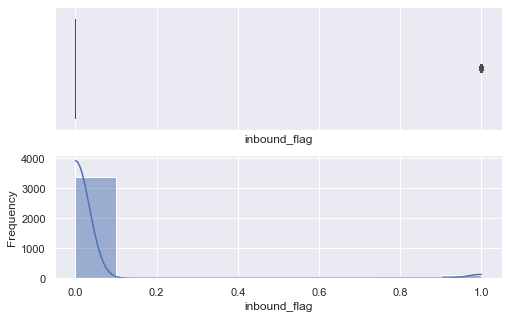

<Figure size 576x360 with 0 Axes>

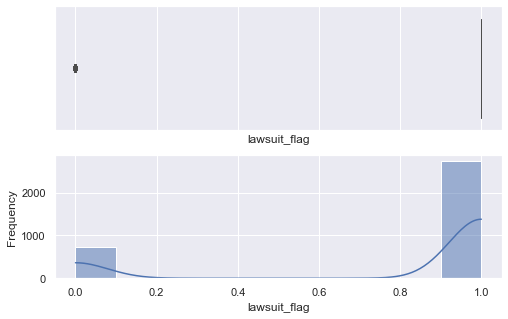

In [41]:
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_num[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df_num[i], ax=ax_hist , bins = 10,kde=True)

#### The TARGET variable

In [42]:
df['Target'].value_counts(normalize=True).sort_values()

1    0.2
0    0.8
Name: Target, dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   c_entity                         3470 non-null   object 
 1   n_account_balance                3470 non-null   float64
 2   d_acq_date                       3470 non-null   object 
 3   n_active_num                     3470 non-null   int64  
 4   d_last_payment_date              3470 non-null   object 
 5   n_pay_30                         3470 non-null   float64
 6   n_pay_60                         3470 non-null   float64
 7   n_pay_90                         3470 non-null   float64
 8   n_pay_180                        3470 non-null   float64
 9   n_pay_count_30                   3470 non-null   int64  
 10  n_pay_count_60                   3470 non-null   int64  
 11  n_pay_count_90                   3470 non-null   int64  
 12  n_pay_count_180     

In [44]:
drop2 = ['d_acq_date', 'd_last_payment_date', 'd_last_inbound_date']

df = df.drop(drop2, axis=1)
df.head()

,c_entity,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,...,c_subregion,gender,age,Target_Amount,Target,payment_flag,inbound_flag,lawsuit_flag,age_bands,sms_flag
0,Entity 1,4643.12,2,0.0,0.0,0.0,0.0,0,0,0,...,Subregion_59,M,31,3500.0,1,0,0,0,22-38,0
1,Entity 1,4823.09,4,0.0,0.0,0.0,0.0,0,0,0,...,Subregion_28,M,28,0.0,0,0,0,1,22-38,0
2,Entity 1,966.41,1,0.0,0.0,0.0,0.0,0,0,0,...,Others,M,35,0.0,0,0,0,0,22-38,1
3,Entity 1,496.58,1,0.0,0.0,0.0,0.0,0,0,0,...,Subregion_5,M,31,0.0,0,0,0,1,22-38,1
4,Entity 1,2609.66,1,0.0,0.0,0.0,0.0,0,0,0,...,Subregion_25,M,30,0.0,0,0,0,0,22-38,0


In [49]:
df.to_csv('variables_to_calculate_IV.csv', index=False)

#### Correlation among variables - Dealing with Redundant Variables

In [45]:
corrMatrix = df.corr()
#print (corrMatrix)
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,n_pay_count_180,n_sms_count,n_deceased,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,age,Target_Amount,Target,payment_flag,inbound_flag,lawsuit_flag,sms_flag
n_account_balance,1.00,0.09,0.00,0.03,0.03,0.04,-0.01,0.01,0.01,0.01,-0.10,0.01,0.02,0.04,0.13,0.01,-0.06,0.01,0.02,-0.01,-0.13
n_active_num,0.09,1.00,0.01,0.03,0.03,0.03,0.00,0.01,0.01,0.01,-0.04,0.02,-0.00,0.05,0.03,0.00,-0.00,0.00,0.09,0.02,-0.06
n_pay_30,0.00,0.01,1.00,0.76,0.67,0.58,0.68,0.47,0.43,0.37,0.02,-0.01,-0.00,0.21,-0.00,0.08,0.16,0.26,0.03,-0.03,0.08
n_pay_60,0.03,0.03,0.76,1.00,0.91,0.84,0.51,0.68,0.66,0.61,0.06,-0.01,-0.01,0.36,0.02,0.16,0.31,0.51,0.05,-0.08,0.13
n_pay_90,0.03,0.03,0.67,0.91,1.00,0.91,0.44,0.62,0.69,0.64,0.06,-0.01,-0.01,0.38,0.03,0.19,0.34,0.55,0.07,-0.07,0.13
n_pay_180,0.04,0.03,0.58,0.84,0.91,1.00,0.37,0.60,0.66,0.67,0.06,-0.01,-0.01,0.37,0.04,0.18,0.35,0.58,0.06,-0.08,0.14
n_pay_count_30,-0.01,0.00,0.68,0.51,0.44,0.37,1.00,0.69,0.61,0.53,0.03,-0.01,-0.00,0.32,0.03,0.05,0.24,0.38,0.05,-0.02,0.11
n_pay_count_60,0.01,0.01,0.47,0.68,0.62,0.60,0.69,1.00,0.93,0.88,0.10,-0.02,-0.01,0.50,0.07,0.11,0.46,0.75,0.08,-0.08,0.18
n_pay_count_90,0.01,0.01,0.43,0.66,0.69,0.66,0.61,0.93,1.00,0.94,0.11,-0.02,-0.01,0.53,0.08,0.13,0.50,0.83,0.09,-0.08,0.19
n_pay_count_180,0.01,0.01,0.37,0.61,0.64,0.67,0.53,0.88,0.94,1.00,0.12,-0.02,-0.01,0.53,0.09,0.13,0.52,0.88,0.07,-0.09,0.20


#### Variable Clustering

In [46]:
!pip install varclushi
from varclushi import VarClusHi

In [47]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   n_account_balance                3470 non-null   float64
 1   n_active_num                     3470 non-null   int64  
 2   n_pay_30                         3470 non-null   float64
 3   n_pay_60                         3470 non-null   float64
 4   n_pay_90                         3470 non-null   float64
 5   n_pay_180                        3470 non-null   float64
 6   n_pay_count_30                   3470 non-null   int64  
 7   n_pay_count_60                   3470 non-null   int64  
 8   n_pay_count_90                   3470 non-null   int64  
 9   n_pay_count_180                  3470 non-null   int64  
 10  n_sms_count                      3470 non-null   int64  
 11  n_deceased                       3470 non-null   int64  
 12  n_bancrupcy_failed_l

In [48]:
#dropping the target variable
df_for_clustering = df_num.copy()
df_for_clustering.drop('Target', axis=1, inplace=True)

In [49]:
clust_model = VarClusHi(df_for_clustering, maxeigval2 = 0.7, maxclus = None)
clust_model.varclus()

In [50]:
clust_model.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,5,3.959704,0.657737,0.791941
1,1,4,3.350337,0.472101,0.837584
2,2,1,1.000000,0.000000,1.000000
3,3,1,1.000000,0.000000,1.000000
4,4,1,1.000000,0.000000,1.000000
5,5,1,1.000000,0.000000,1.000000
6,6,1,1.000000,0.000000,1.000000
7,7,1,1.000000,0.000000,1.000000
8,8,1,1.000000,0.000000,1.000000
9,9,1,1.000000,0.000000,1.000000


In [51]:
clust_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,n_pay_count_60,0.869164,0.475425,2.494131e-01
1,0,n_pay_count_90,0.939253,0.445955,1.096432e-01
2,0,n_pay_count_180,0.934978,0.397897,1.079923e-01
3,0,n_arrangement_active,0.412221,0.132447,6.775139e-01
4,0,payment_flag,0.804089,0.274967,2.702098e-01
5,1,n_pay_30,0.656721,0.456433,6.315303e-01
6,1,n_pay_60,0.930148,0.411066,1.186082e-01
7,1,n_pay_90,0.922467,0.430364,1.361101e-01
8,1,n_pay_180,0.841001,0.429532,2.787170e-01
9,2,n_bancrupcy_failed_lawsuits_etc,1.000000,0.070485,0.000000e+00


In [52]:
df.describe()

,n_account_balance,n_active_num,n_pay_30,n_pay_60,n_pay_90,n_pay_180,n_pay_count_30,n_pay_count_60,n_pay_count_90,n_pay_count_180,...,n_deceased,n_bancrupcy_failed_lawsuits_etc,n_arrangement_active,age,Target_Amount,Target,payment_flag,inbound_flag,lawsuit_flag,sms_flag
count,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,...,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000,3470.000000
mean,14385.726939,1.965994,4.735905,24.211847,45.872648,104.091599,0.014121,0.077522,0.141787,0.318156,...,0.004035,0.002017,0.071758,46.457061,160.872666,0.200000,0.090202,0.031700,0.791931,0.382133
std,27643.229669,2.062443,58.580808,151.852152,265.206277,569.291480,0.118007,0.326652,0.540182,1.150877,...,0.063399,0.050895,0.258124,12.458257,973.097862,0.400058,0.286512,0.175226,0.405985,0.485979
min,13.170000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1190.745000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3824.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,15305.925000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,342964.730000,42.000000,2000.000000,4000.000000,6000.000000,12000.000000,1.000000,3.000000,5.000000,8.000000,...,1.000000,2.000000,1.000000,88.000000,21000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   c_entity                         3470 non-null   object 
 1   n_account_balance                3470 non-null   float64
 2   n_active_num                     3470 non-null   int64  
 3   n_pay_30                         3470 non-null   float64
 4   n_pay_60                         3470 non-null   float64
 5   n_pay_90                         3470 non-null   float64
 6   n_pay_180                        3470 non-null   float64
 7   n_pay_count_30                   3470 non-null   int64  
 8   n_pay_count_60                   3470 non-null   int64  
 9   n_pay_count_90                   3470 non-null   int64  
 10  n_pay_count_180                  3470 non-null   int64  
 11  c_type_of_portfolio_rap          3470 non-null   object 
 12  n_sms_count         

In [54]:
df_model2 = df[['c_subregion','age_bands','c_type_of_portfolio_rap','gender','n_account_balance','n_active_num', 'n_pay_count_90','n_sms_count', 'n_deceased','n_arrangement_active','inbound_flag','Target','lawsuit_flag']]
df_model2

,c_subregion,age_bands,c_type_of_portfolio_rap,gender,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,Target,lawsuit_flag
0,Subregion_59,22-38,telecom,M,4643.12,2,0,0,0,0,0,1,0
1,Subregion_28,22-38,telecom,M,4823.09,4,0,0,0,0,0,0,1
2,Others,22-38,telecom,M,966.41,1,0,4,0,0,0,0,0
3,Subregion_5,22-38,telecom,M,496.58,1,0,6,0,0,0,0,1
4,Subregion_25,22-38,telecom,M,2609.66,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,Subregion_42,22-38,telecom,K,333.69,2,0,2,0,0,0,0,0
3466,Subregion_45,39-48,telecom,K,2671.60,1,0,1,0,0,0,0,1
3467,Subregion_48,22-38,telecom,K,893.32,1,0,0,0,0,0,0,1
3468,Subregion_45,22-38,telecom,K,439.56,1,0,0,0,0,0,0,1


In [55]:
df_model2.insert(0, "intercept", 1)

In [56]:
df_model = df[['age','c_type_of_portfolio_rap','gender','n_account_balance','n_active_num', 'n_pay_count_90','n_sms_count', 'n_deceased','n_arrangement_active','inbound_flag','Target']]
df_model

,age,c_type_of_portfolio_rap,gender,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,Target
0,31,telecom,M,4643.12,2,0,0,0,0,0,1
1,28,telecom,M,4823.09,4,0,0,0,0,0,0
2,35,telecom,M,966.41,1,0,4,0,0,0,0
3,31,telecom,M,496.58,1,0,6,0,0,0,0
4,30,telecom,M,2609.66,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3465,37,telecom,K,333.69,2,0,2,0,0,0,0
3466,42,telecom,K,2671.60,1,0,1,0,0,0,0
3467,35,telecom,K,893.32,1,0,0,0,0,0,0
3468,31,telecom,K,439.56,1,0,0,0,0,0,0


In [57]:
df_model.insert(0, "intercept", 1)

In [58]:
df_model

,intercept,age,c_type_of_portfolio_rap,gender,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,Target
0,1,31,telecom,M,4643.12,2,0,0,0,0,0,1
1,1,28,telecom,M,4823.09,4,0,0,0,0,0,0
2,1,35,telecom,M,966.41,1,0,4,0,0,0,0
3,1,31,telecom,M,496.58,1,0,6,0,0,0,0
4,1,30,telecom,M,2609.66,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3465,1,37,telecom,K,333.69,2,0,2,0,0,0,0
3466,1,42,telecom,K,2671.60,1,0,1,0,0,0,0
3467,1,35,telecom,K,893.32,1,0,0,0,0,0,0
3468,1,31,telecom,K,439.56,1,0,0,0,0,0,0


### MODEL 6

In [59]:
df_model2

,intercept,c_subregion,age_bands,c_type_of_portfolio_rap,gender,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,Target,lawsuit_flag
0,1,Subregion_59,22-38,telecom,M,4643.12,2,0,0,0,0,0,1,0
1,1,Subregion_28,22-38,telecom,M,4823.09,4,0,0,0,0,0,0,1
2,1,Others,22-38,telecom,M,966.41,1,0,4,0,0,0,0,0
3,1,Subregion_5,22-38,telecom,M,496.58,1,0,6,0,0,0,0,1
4,1,Subregion_25,22-38,telecom,M,2609.66,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,1,Subregion_42,22-38,telecom,K,333.69,2,0,2,0,0,0,0,0
3466,1,Subregion_45,39-48,telecom,K,2671.60,1,0,1,0,0,0,0,1
3467,1,Subregion_48,22-38,telecom,K,893.32,1,0,0,0,0,0,0,1
3468,1,Subregion_45,22-38,telecom,K,439.56,1,0,0,0,0,0,0,1


In [400]:
#### REMOVING AGE, ADDING INBOUND

In [60]:
# storing features and target in separate variables
label = df_model2['Target']
features = df_model2.drop('Target', axis=1)

In [61]:
features

,intercept,c_subregion,age_bands,c_type_of_portfolio_rap,gender,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,lawsuit_flag
0,1,Subregion_59,22-38,telecom,M,4643.12,2,0,0,0,0,0,0
1,1,Subregion_28,22-38,telecom,M,4823.09,4,0,0,0,0,0,1
2,1,Others,22-38,telecom,M,966.41,1,0,4,0,0,0,0
3,1,Subregion_5,22-38,telecom,M,496.58,1,0,6,0,0,0,1
4,1,Subregion_25,22-38,telecom,M,2609.66,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,1,Subregion_42,22-38,telecom,K,333.69,2,0,2,0,0,0,0
3466,1,Subregion_45,39-48,telecom,K,2671.60,1,0,1,0,0,0,1
3467,1,Subregion_48,22-38,telecom,K,893.32,1,0,0,0,0,0,1
3468,1,Subregion_45,22-38,telecom,K,439.56,1,0,0,0,0,0,1


In [62]:
# Applying log transformation to account_balance variable
features['account_balance_log'] = np.log(features['n_account_balance'])

In [63]:
# Applying log transformation to account_balance variable
#features['active_num_log'] = np.log(features['n_active_num'])

In [64]:
features

,intercept,c_subregion,age_bands,c_type_of_portfolio_rap,gender,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,lawsuit_flag,account_balance_log
0,1,Subregion_59,22-38,telecom,M,4643.12,2,0,0,0,0,0,0,8.443142
1,1,Subregion_28,22-38,telecom,M,4823.09,4,0,0,0,0,0,1,8.481170
2,1,Others,22-38,telecom,M,966.41,1,0,4,0,0,0,0,6.873588
3,1,Subregion_5,22-38,telecom,M,496.58,1,0,6,0,0,0,1,6.207745
4,1,Subregion_25,22-38,telecom,M,2609.66,1,0,0,0,0,0,0,7.866975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,1,Subregion_42,22-38,telecom,K,333.69,2,0,2,0,0,0,0,5.810212
3466,1,Subregion_45,39-48,telecom,K,2671.60,1,0,1,0,0,0,1,7.890433
3467,1,Subregion_48,22-38,telecom,K,893.32,1,0,0,0,0,0,1,6.794945
3468,1,Subregion_45,22-38,telecom,K,439.56,1,0,0,0,0,0,1,6.085774


In [65]:
# OneHOt encoding categorical variables
features_model = pd.get_dummies(features, columns=['gender','age_bands'], drop_first = True)
features_model.head()

,intercept,c_subregion,c_type_of_portfolio_rap,n_account_balance,n_active_num,n_pay_count_90,n_sms_count,n_deceased,n_arrangement_active,inbound_flag,lawsuit_flag,account_balance_log,gender_M,gender_N,age_bands_39-48,age_bands_49-58,age_bands_59-68,age_bands_69-78,age_bands_79-88
0,1,Subregion_59,telecom,4643.12,2,0,0,0,0,0,0,8.443142,1,0,0,0,0,0,0
1,1,Subregion_28,telecom,4823.09,4,0,0,0,0,0,1,8.481170,1,0,0,0,0,0,0
2,1,Others,telecom,966.41,1,0,4,0,0,0,0,6.873588,1,0,0,0,0,0,0
3,1,Subregion_5,telecom,496.58,1,0,6,0,0,0,1,6.207745,1,0,0,0,0,0,0
4,1,Subregion_25,telecom,2609.66,1,0,0,0,0,0,0,7.866975,1,0,0,0,0,0,0


In [66]:
drop6 = features_model[['n_account_balance','n_deceased','n_active_num','c_type_of_portfolio_rap','inbound_flag','c_subregion','lawsuit_flag']]
features_model = features_model.drop(drop6, axis=1)

In [67]:
features_model

,intercept,n_pay_count_90,n_sms_count,n_arrangement_active,account_balance_log,gender_M,gender_N,age_bands_39-48,age_bands_49-58,age_bands_59-68,age_bands_69-78,age_bands_79-88
0,1,0,0,0,8.443142,1,0,0,0,0,0,0
1,1,0,0,0,8.481170,1,0,0,0,0,0,0
2,1,0,4,0,6.873588,1,0,0,0,0,0,0
3,1,0,6,0,6.207745,1,0,0,0,0,0,0
4,1,0,0,0,7.866975,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3465,1,0,2,0,5.810212,0,0,0,0,0,0,0
3466,1,0,1,0,7.890433,0,0,1,0,0,0,0
3467,1,0,0,0,6.794945,0,0,0,0,0,0,0
3468,1,0,0,0,6.085774,0,0,0,0,0,0,0


In [68]:
### target variable
label

0       1
1       0
2       0
3       0
4       0
       ..
3465    0
3466    0
3467    0
3468    0
3469    0
Name: Target, Length: 3470, dtype: int64

In [69]:
# creating the train and test datset
x_train, x_test, y_train, y_test = train_test_split(features_model, label, test_size=0.3, random_state=0)

In [70]:
x_train.describe()

,intercept,n_pay_count_90,n_sms_count,n_arrangement_active,account_balance_log,gender_M,gender_N,age_bands_39-48,age_bands_49-58,age_bands_59-68,age_bands_69-78,age_bands_79-88
count,2429.0,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000
mean,1.0,0.144092,1.550432,0.066282,8.347256,0.509675,0.070399,0.335941,0.195965,0.130918,0.045286,0.009057
std,0.0,0.543635,2.619867,0.248826,1.643659,0.500009,0.255872,0.472416,0.397024,0.337380,0.207974,0.094757
min,1.0,0.000000,0.000000,0.000000,3.168845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,7.056037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,8.263129,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,2.000000,0.000000,9.673774,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,5.000000,20.000000,1.000000,12.745383,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [355]:
# Set the regularization type (L1, L2, Elastic Net)
#penalty = 'l2'

In [297]:
# Set the regularization strength (C)
#C = 0.01

In [71]:
#instatiating the estimator
lr_model6 = LogisticRegression(solver='lbfgs', max_iter=500).fit(x_train, y_train)

In [72]:
# predicting on test set
y_predicted6 = lr_model6.predict(x_test)

In [73]:
print("OVR training accuracy:", lr_model6.score(x_train, y_train))
print("OVR test accuracy    :", lr_model6.score(x_test, y_test))

OVR training accuracy: 0.8723754631535612
OVR test accuracy    : 0.8597502401536984


In [74]:
# using scikit learn to extract the coefficients
print("Model Coefficients: ", lr_model6.coef_)

Model Coefficients:  [[-0.00482032  2.75607249  0.2016883   1.20583783 -0.10646652 -0.43794786
  -0.24434153 -0.30162026 -0.45595194 -0.00889226 -0.09214908 -0.07612843]]


In [75]:
# using scikit learn to extract the coefficients 
#(scikit learnt does not provide a built -in function to show a summary of a regression)
print("\Model Intercept: ",lr_model6.intercept_)

\Model Intercept:  [-1.02029075]


In [76]:
# using statsmodels to extract the coefficients
logit_model6=sm.Logit(y_train,x_train)
result=logit_model6.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.347322
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 2429
Model:                          Logit   Df Residuals:                     2417
Method:                           MLE   Df Model:                           11
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:                  0.2963
Time:                        10:28:28   Log-Likelihood:                -843.64
converged:                       True   LL-Null:                       -1198.9
Covariance Type:            nonrobust   LLR p-value:                2.897e-145
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.9947      0.344     -2.890      0.004      -1.669      -0.320

In [77]:
# using statsmodels to extract the coefficients
logit_model6=sm.GLM(y_train,x_train, family=sm.families.Binomial())
result=logit_model6.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                 2429
Model:                            GLM   Df Residuals:                     2417
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -843.64
Date:                Fri, 21 Apr 2023   Deviance:                       1687.3
Time:                        10:28:31   Pearson chi2:                 2.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2536
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.9947 

In [78]:
print(confusion_matrix(y_test, y_predicted6))
print(classification_report(y_test, y_predicted6))

[[817   4]
 [142  78]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       821
           1       0.95      0.35      0.52       220

    accuracy                           0.86      1041
   macro avg       0.90      0.67      0.72      1041
weighted avg       0.87      0.86      0.83      1041



In [79]:
import sklearn.metrics as metrics

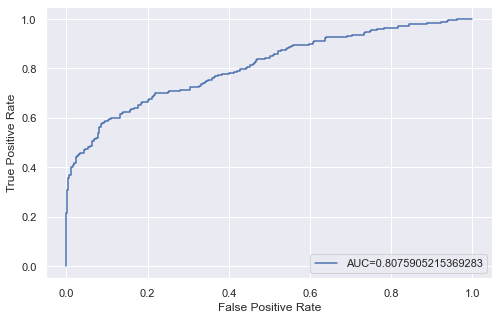

In [80]:
#define metrics
y_pred_proba6 = lr_model6.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba6)
auc = metrics.roc_auc_score(y_test, y_pred_proba6)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [81]:
# Create the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba6)

df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr

,FPR,TPR,Threshold
0,0.000000,0.000000,1.999652
1,0.000000,0.004545,0.999652
2,0.000000,0.213636,0.976024
3,0.001218,0.213636,0.974765
4,0.001218,0.304545,0.722183
...,...,...,...
233,0.940317,0.990909,0.056167
234,0.940317,0.995455,0.056106
235,0.963459,0.995455,0.053582
236,0.963459,1.000000,0.053580


In [82]:
# Define threshold 
y_predict_class = [1 if prob > 0.70 else 0 for prob in y_pred_proba6]

In [83]:
sum(y_test)

220

In [84]:
sum(y_predict_class)

68

In [85]:
# calculating the odds ratios of each coefficient
odds_ratios = pd.DataFrame(
    {
        "OR": result.params,
        "Lower CI": result.conf_int()[0],
        "Upper CI": result.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)

print(odds_ratios)

                             OR   Lower CI   Upper CI
intercept              0.369843   0.188398   0.726040
n_pay_count_90        19.068629  10.996279  33.066875
n_sms_count            1.224015   1.175723   1.274290
n_arrangement_active   3.574499   2.101767   6.079191
account_balance_log    0.896391   0.827599   0.970901
gender_M               0.638199   0.492714   0.826643
gender_N               0.767068   0.434142   1.355303
age_bands_39-48        0.727493   0.521375   1.015098
age_bands_49-58        0.612271   0.418700   0.895334
age_bands_59-68        0.972316   0.652586   1.448694
age_bands_69-78        0.886918   0.482016   1.631944
age_bands_79-88        0.885077   0.255656   3.064124


#### UnderSampling2

In [95]:
#instatiating the estimator
lr = LogisticRegression(solver='lbfgs', max_iter=500)

In [96]:
under_sampler = RandomUnderSampler()

In [97]:
# applying resampling to the training set only
x_undersampled, y_undersampled = under_sampler.fit_resample(x_train, y_train)

In [98]:
# fitting lr classifier to the training set
lr_model_undersampled = lr.fit(x_undersampled, y_undersampled)

In [99]:
y_predicted_undersampled = lr_model_undersampled.predict(x_test)

In [100]:
print("OVR training accuracy:", lr_model_undersampled.score(x_undersampled, y_undersampled))
print("OVR test accuracy    :", lr_model_undersampled.score(x_test, y_test))

OVR training accuracy: 0.7320675105485233
OVR test accuracy    : 0.8097982708933718


In [101]:
logit_model6=sm.Logit(y_undersampled, x_undersampled)
result=logit_model6.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.502731
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                  948
Model:                          Logit   Df Residuals:                      936
Method:                           MLE   Df Model:                           11
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:                  0.2747
Time:                        10:32:49   Log-Likelihood:                -476.59
converged:                       True   LL-Null:                       -657.10
Covariance Type:            nonrobust   LLR p-value:                 1.122e-70
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept                0.7268      0.429      1.693      0.090      -0.114       1.568

In [102]:
print(confusion_matrix(y_test, y_predicted_undersampled))
print(classification_report(y_test, y_predicted_undersampled))

[[711 110]
 [ 88 132]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       821
           1       0.55      0.60      0.57       220

    accuracy                           0.81      1041
   macro avg       0.72      0.73      0.72      1041
weighted avg       0.82      0.81      0.81      1041



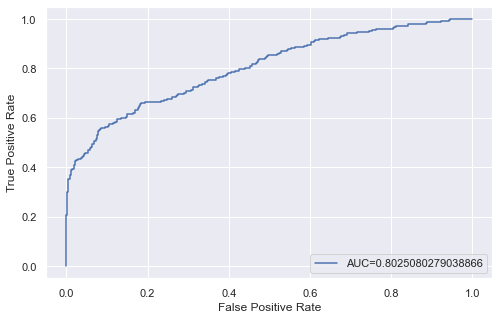

In [104]:
#define metrics
y_pred_proba6 = lr_model_undersampled.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba6)
auc = metrics.roc_auc_score(y_test, y_pred_proba6)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()